In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## EDA

In [3]:
df.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [4]:
# huge ratio of nulls throughout
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [5]:
print("There are", len(df['galactic year'].unique()), "unique years")
print("There are", len(df['galaxy'].unique()), "unique galaxies")

There are 26 unique years
There are 181 unique galaxies


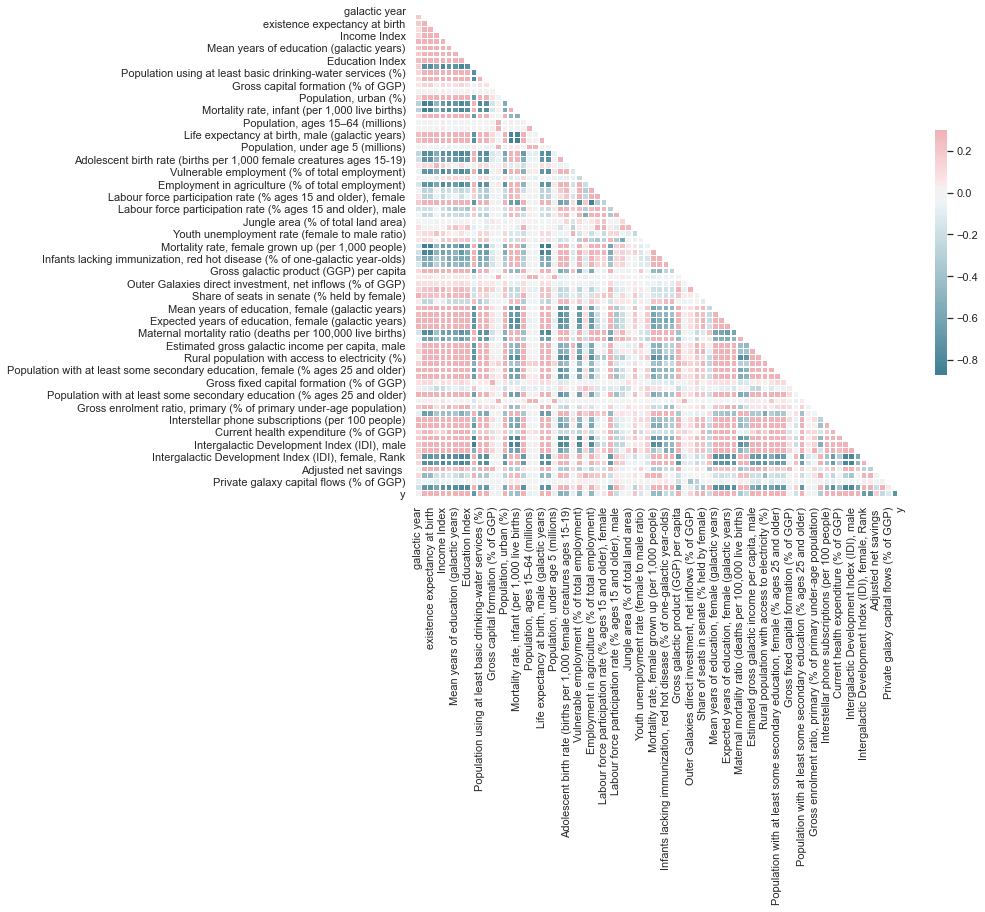

In [36]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


In [40]:
df.corr().y.sort_values(ascending=False)

y                                                                                   1.000000
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.679981
Estimated gross galactic income per capita, female                                  0.667465
Interstellar Data Net users, total (% of population)                                0.651823
Intergalactic Development Index (IDI)                                               0.625114
                                                                                      ...   
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)                   -0.533741
Intergalactic Development Index (IDI), female, Rank                                -0.664882
Intergalactic Development Index (IDI), male, Rank                                  -0.680577
Intergalactic Development Index (IDI), Rank                                        -0.681592
Gender Inequality Index (GII)                                         

In [6]:
df[df.galaxy == "Virgo I"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 2 to 3842
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            24 non-null     int64  
 1   galaxy                                                                                   24 non-null     object 
 2   existence expectancy index                                                               24 non-null     float64
 3   existence expectancy at birth                                                            24 non-null     float64
 4   Gross income per capita                                                                  24 non-null     float64
 5   Income Index                                                    

## Different ways of dealing with NaNs

In [7]:
# dealing with NAs - Drop
# df = df.dropna()

In [8]:
# dealing with NAs - fill mean
# df = df.fillna(df.mean())

In [9]:
# dealing with NAs - interpolate based on time for each galaxy
df[df.galaxy == "Virgo I"]

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
309,991020,Virgo I,0.555338,58.867426,24763.531222,0.463406,7.536744,2.763276,0.502295,0.342069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049411
364,992016,Virgo I,0.554174,60.551216,11439.589593,0.524210,7.485369,5.545963,0.430654,0.390630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049193
635,993012,Virgo I,0.612921,62.918772,24467.082523,0.481154,7.357494,5.868132,0.489407,0.348280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048858
897,994009,Virgo I,0.630974,50.942282,19221.268239,0.506944,7.312539,6.109797,0.412421,0.377290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048516
968,995006,Virgo I,0.520525,52.285830,13607.203918,0.506698,8.418098,6.633808,0.542612,0.421850,...,0.401238,0.535206,0.793324,201.082459,158.180644,NaN,14.371015,NaN,0.865088,0.048241
1130,996004,Virgo I,0.548997,56.391857,20383.999095,0.488850,8.042709,5.781784,0.505141,0.366044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047036
1292,997002,Virgo I,0.605644,54.017237,27140.832645,0.535970,8.549291,5.357715,0.508980,0.371260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046734
1487,998001,Virgo I,0.622283,53.856547,15711.532316,0.416046,8.757084,4.701411,0.522742,0.361373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046350
1678,999000,Virgo I,0.493658,53.845410,9493.354352,0.588740,7.483733,6.143015,0.516501,0.501029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046022


## Dealing With NANs with interpolation and Backfilling per galaxy

In [10]:

def interpolator(df):
    for g in df.galaxy.unique():
        #splitting out the individual galaxies
        df_temp = df[df['galaxy']==g].copy()
        df = df[~(df['galaxy']==g)]
        #filling the Nans (first with interpolation and then backfilling if missing for start)
        df_temp.sort_values("galactic year",inplace=True)
        df_temp.interpolate(inplace=True)
        df_temp.fillna(method ='bfill',inplace=True)
        df_temp.fillna(method ='ffill',inplace=True)
        #adding back to dataframe
        df = pd.concat([df,df_temp])
    #filling the Nans for any which didnt have anything to fill at all
    df.fillna(df.mean(),inplace=True)
    return df
        


In [11]:
# df = interpolator()

In [12]:
# df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,5.248527,0.576582,0.526375,...,0.634861,0.725081,0.970576,156.177926,157.805539,31.506926,6.377529,23.612347,0.698595,0.052590
194,991020,Large Magellanic Cloud (LMC),0.627245,62.389059,17114.109182,0.503198,9.317262,5.248527,0.576582,0.526375,...,0.634861,0.725081,0.970576,156.177926,157.805539,31.506926,6.377529,23.612347,0.698595,0.052115
410,992016,Large Magellanic Cloud (LMC),0.662135,68.794245,13225.033915,0.692653,8.030645,5.248527,0.576582,0.526375,...,0.634861,0.725081,0.970576,156.177926,157.805539,31.506926,6.377529,23.612347,0.698595,0.052006
543,993012,Large Magellanic Cloud (LMC),0.687776,62.848660,9116.133706,0.667264,11.347429,5.248527,0.576582,0.526375,...,0.634861,0.725081,0.970576,156.177926,157.805539,31.506926,6.377529,23.612347,0.698595,0.051675
765,994009,Large Magellanic Cloud (LMC),0.727717,67.482431,3598.172394,0.609830,10.402265,5.248527,0.576582,0.526375,...,0.634861,0.725081,0.970576,156.177926,157.805539,31.506926,6.377529,23.612347,0.698595,0.051334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,1004004,NGC 5102,1.091676,86.984952,66671.711229,1.069811,19.201916,13.947544,1.113395,1.057824,...,1.048421,0.964559,1.055873,37.719630,74.169742,20.784777,6.377529,36.281833,0.387535,0.165448
2848,1005006,NGC 5102,1.080452,92.192055,52238.818082,0.981938,19.461596,15.568753,0.956783,1.012429,...,1.047132,0.956981,1.046888,33.178344,78.998671,21.679276,6.377529,37.802577,0.386109,0.166074
3040,1006009,NGC 5102,1.143596,89.762503,46090.953928,1.103940,21.213489,16.022024,1.128388,0.945926,...,1.077782,1.039218,1.042863,59.170924,74.545528,18.460118,6.377529,37.116701,0.419120,0.166249
3512,1012036,NGC 5102,1.083807,87.420338,61057.801088,1.110189,16.698035,15.320563,1.019514,1.223794,...,1.108432,1.121454,1.038837,85.163505,70.092384,15.240960,6.377529,36.430824,0.452132,0.176675


In [63]:
df["train_test"] = 'train'
df_test["train_test"] = "test"

df_combined = pd.concat([df,df_test])

In [64]:
df_combined

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,train_test
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,5.248527,0.576582,0.526375,...,0.725081,0.970576,162.494448,161.464294,43.391708,6.313144,23.228536,0.764961,0.052590,train
194,991020,Large Magellanic Cloud (LMC),0.627245,62.389059,17114.109182,0.503198,9.317262,5.248527,0.576582,0.526375,...,0.725081,0.970576,162.494448,161.464294,43.391708,6.313144,23.228536,0.764961,0.052115,train
410,992016,Large Magellanic Cloud (LMC),0.662135,68.794245,13225.033915,0.692653,8.030645,5.248527,0.576582,0.526375,...,0.725081,0.970576,162.494448,161.464294,43.391708,6.313144,23.228536,0.764961,0.052006,train
543,993012,Large Magellanic Cloud (LMC),0.687776,62.848660,9116.133706,0.667264,11.347429,5.248527,0.576582,0.526375,...,0.725081,0.970576,162.494448,161.464294,43.391708,6.313144,23.228536,0.764961,0.051675,train
765,994009,Large Magellanic Cloud (LMC),0.727717,67.482431,3598.172394,0.609830,10.402265,5.248527,0.576582,0.526375,...,0.725081,0.970576,162.494448,161.464294,43.391708,6.313144,23.228536,0.764961,0.051334,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,1010025,NGC 5102,1.087315,94.358020,58928.171228,1.059259,20.816111,16.328831,1.117890,1.130034,...,1.048943,1.001324,61.357351,43.071431,26.583421,6.313144,19.421367,0.425925,0.173200,test
819,1011030,NGC 5102,1.098575,95.038326,65677.800337,1.106619,20.595905,15.146003,1.102725,1.058891,...,1.010633,1.047582,45.229217,80.724239,19.621259,6.313144,13.439265,0.355022,0.174937,test
771,1014049,NGC 5102,1.072294,91.008395,53924.335486,1.248042,21.642868,15.311885,1.059293,1.122439,...,1.042512,1.048632,82.367260,18.526901,19.753047,6.313144,16.880911,0.367476,0.182978,test
812,1015056,NGC 5102,1.093103,90.356852,59839.277522,1.036271,20.641398,15.832680,1.004845,1.002551,...,1.103109,1.080281,82.791271,57.295003,9.882289,6.313144,20.583542,0.308192,0.182978,test


In [66]:
df_combined = interpolator(df_combined)
df_combined = pd.get_dummies(df_combined, columns=['galaxy'])

In [68]:
df = df_combined[df_combined["train_test"]=='train'].copy()
df_test = df_combined[df_combined["train_test"]=='test'].copy()
df.drop('train_test',axis=1,inplace=True)
df_test.drop('train_test',axis=1,inplace=True)

In [72]:
df_test.sort_index(inplace=True)
df_test

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,galaxy_UGCA 292,galaxy_UGCA 438 (ESO 407-018),galaxy_UGCA 86,galaxy_UGCA 92,galaxy_Ursa Major I Dwarf (UMa I dSph),galaxy_Ursa Major II Dwarf,galaxy_Ursa Minor Dwarf,galaxy_Virgo I,galaxy_Willman 1,"galaxy_Wolf-Lundmark-Melotte (WLM, DDO 221)"
0,1007012,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,...,0,0,0,0,0,0,0,0,0,0
1,1007012,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,...,0,0,0,0,0,0,0,0,0,0
2,1008016,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,...,0,0,0,0,0,0,0,0,0,0
3,1007012,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,...,0,0,0,0,0,0,0,0,0,0
4,1013042,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064,0.859797,75.291914,18170.157548,0.707996,11.154777,4.190958,0.701760,0.540954,212.874869,...,0,0,0,0,0,0,0,0,0,0
886,1016064,0.912304,72.601017,19767.681597,0.715522,13.126625,10.552630,0.732641,0.622619,190.209811,...,0,0,0,0,0,0,0,0,0,0
887,1016064,1.090993,88.276857,31700.561656,0.957858,19.425120,11.120741,1.092724,0.974172,128.115014,...,0,0,0,0,0,0,0,0,0,0
888,1016064,1.005144,82.100572,25561.963151,0.751660,16.198364,13.756741,0.819249,0.884783,156.160418,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.to_csv("train_amended.csv",index=False)
df_test.to_csv("test_amended.csv",index=False)

## Exploring the Optimisation Formulas

In [15]:
y_min = df.y.min()
y_max = df.y.max()
print(y_min,y_max)
x = np.linspace(0.00001,5,30)
y = -np.log(x*+0.01)+3

0.013036451766586963 0.6838126553011508


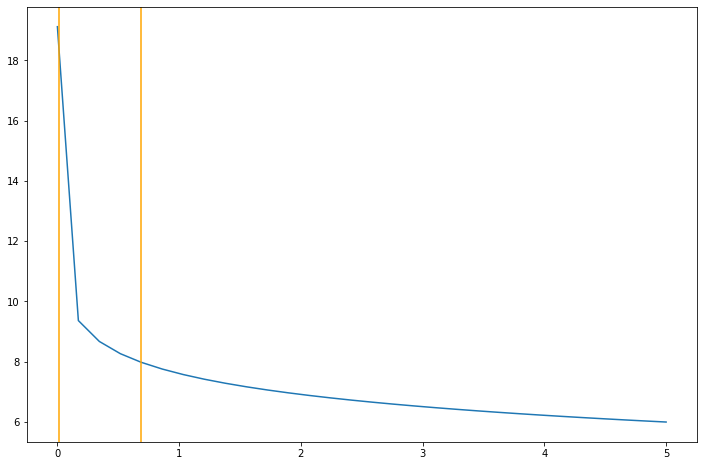

In [16]:
# Potential for increase in the Index = -np.log(Index+0.01)+3
plt.subplots(figsize=(12, 8))
plt.plot(x,y)
plt.axvline(x=y_min,c='orange')
plt.axvline(x=y_max,c='orange')
plt.show()

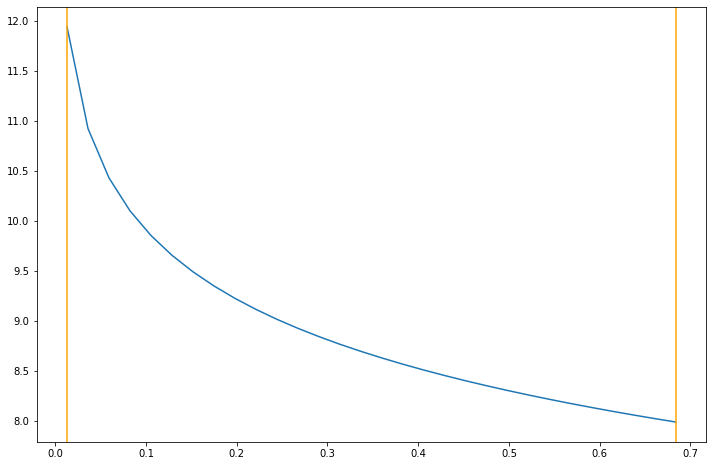

In [20]:
plt.subplots(figsize=(12, 8))
x = np.linspace(y_min,y_max,30)
y = -np.log(x*+0.01)+3
plt.plot(x,y)
plt.axvline(x=y_min,c='orange')
plt.axvline(x=y_max,c='orange')
plt.show()

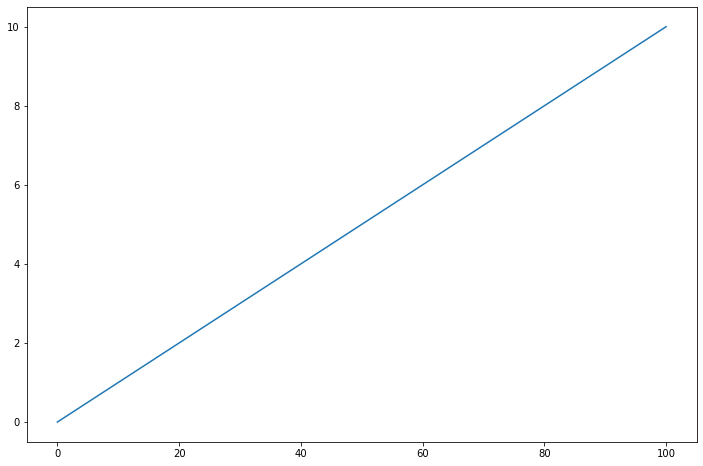

In [21]:
# Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000
energy = np.linspace(0,100,100)
z = energy * 10**2/1000 

plt.subplots(figsize=(12, 8))
plt.plot(energy,z)
plt.show()

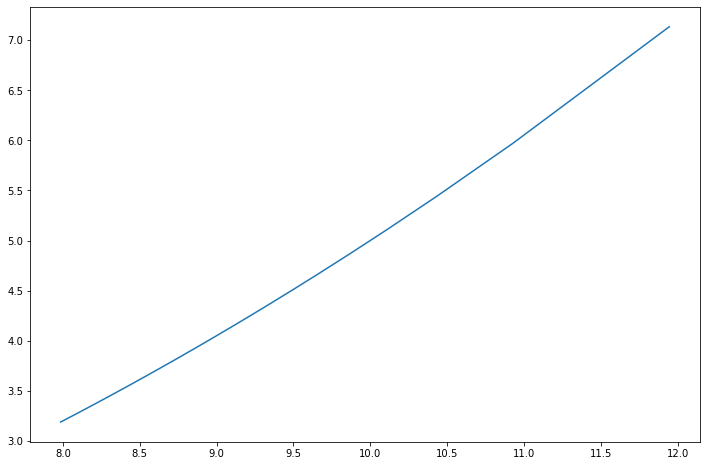

In [22]:
# Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000
energy = np.linspace(0,100,100)
z = 50 * (y**2)/1000 

plt.subplots(figsize=(12, 8))
plt.plot(y,z)
plt.show()

In [ ]:

z = energy * (-np.log(y*+0.01)+3)**2 / 1000

# where energy is between 0-100
# where y we will have predicted
# where z is the increase in the y

# we are maximising the sum of z



In [28]:
# will be different in the test set but as an example
df_test['existence expectancy index'].describe()

count    885.000000
mean       0.923881
std        0.134856
min        0.456086
25%        0.834118
50%        0.944683
75%        1.022712
max        1.250508
Name: existence expectancy index, dtype: float64

In [33]:
print(round(len(df_test[df_test['existence expectancy index']<0.7])/len(df_test)*100,2),"% of the test set need to get 10% of the energy")


7.42 % of the test set need to get 10% of the energy


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,...,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064,ESO 383-087 (ISG 39),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,1016064,NGC 247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,1016064,ESO 325-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,1016064,ESO 540-032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# As there are 890 galaxies to give power -  average power given per galaxy is 56.1 power
